# Plot Histogram for Normal and Sick X ray images

## Import and set paths

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import seaborn as sns

In [2]:
data_address = os.path.join(os.getcwd(),'../..', 'Data')
data_address

'/nfs/home/hld9606/Covid_19_Classification/EDA/../../Data'

In [3]:
data_address = os.path.join(os.getcwd(),'../..', 'Data')
image_address = os.path.join(data_address, 'Coronahack-Chest-XRay-Dataset', 'Coronahack-Chest-XRay-Dataset')
training_label = pd.read_csv(os.path.join(data_address, 'training_label.csv'))
testing_label = pd.read_csv(os.path.join(data_address, 'testing_label.csv'))


In [4]:
train_images_normal = [os.path.join(image_address, 'train', filename) for filename in training_label[training_label.Label == 'Normal'].X_ray_image_name.tolist()]
train_images_sick = [os.path.join(image_address, 'train', filename) for filename in training_label[training_label.Label == 'Pnemonia'].X_ray_image_name.tolist()]
test_images_normal = [os.path.join(image_address, 'test', filename) for filename in testing_label[testing_label.Label == 'Normal'].X_ray_image_name.tolist()]
test_images_sick = [os.path.join(image_address, 'test', filename) for filename in testing_label[testing_label.Label == 'Pnemonia'].X_ray_image_name.tolist()]


## Normal vs Sick

#### Preview the images for both normal and phemonia types

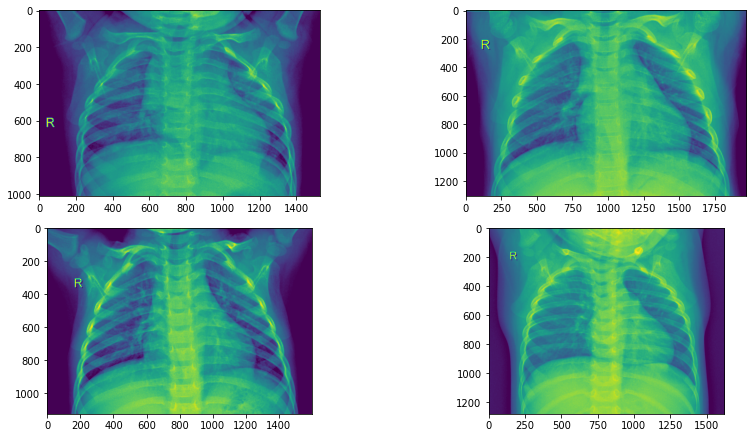

In [5]:
from PIL import Image
path_draw = train_images_normal[:4]
plt.figure(figsize = (12,12))
for i, v in enumerate(path_draw):
    try:
        image = Image.open(v)
        plt.subplot(4,2,i+1)
        plt.imshow(image)
    except:
        continue

plt.tight_layout()
plt.savefig('Normal.png', dpi = 500)

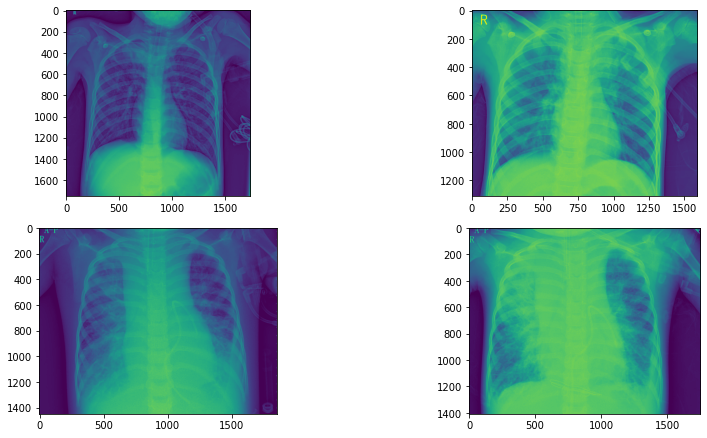

In [6]:
from PIL import Image
path_draw = train_images_sick[:4]

plt.figure(figsize = (12,12))
for i, v in enumerate(path_draw):
    try:
        image = Image.open(v)
        plt.subplot(4,2,i+1)
        plt.imshow(image)
    except:
        continue

plt.tight_layout()
plt.savefig('Sick.png', dpi = 500)

#### Plot histograms of pixel intensities

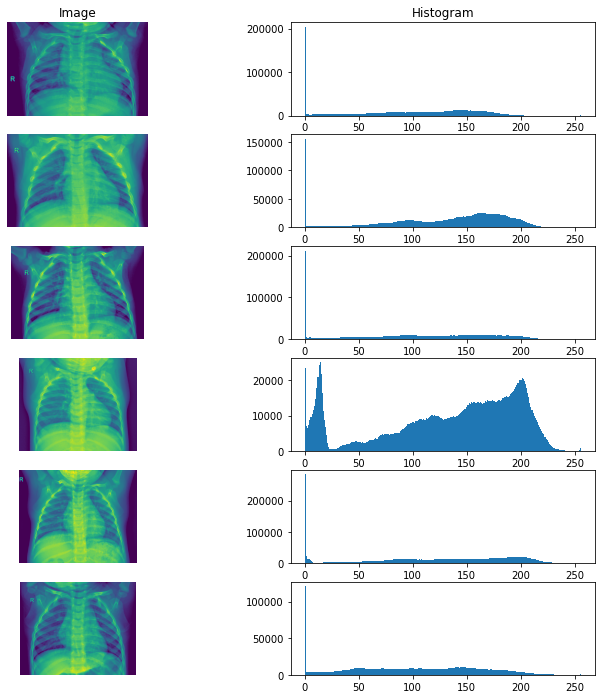

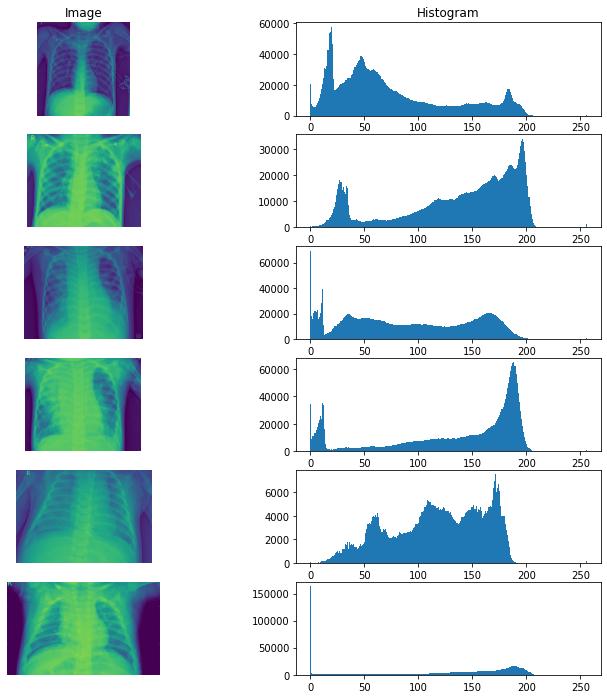

In [7]:
# Histogram analysis
def plot_graph_hist(path_draw, figsize = (12,12), title_left = 'Image', title_right = 'Histogram', mode = None):
    fig, ax = plt.subplots(len(path_draw), 2, figsize=figsize)
    for i, v in enumerate(path_draw):
        image = plt.imread(v)
        ax[i, 0].imshow(image)
        if mode == 'RGB':
            for col, channel in zip('rgb', np.rollaxis(image, axis=-1)):
                hist, bin_centers = exposure.histogram(channel)
                ax[i, 1].fill_between(bin_centers, hist, color=col, alpha=0.4)
        else:
            ax[i, 1].hist(image.ravel(), 256, [0, 256])
            ax[i, 0].axis('off')
        if i == 0:
            ax[i, 0].set_title(title_left)
            ax[i, 1].set_title(title_right)
    plt.show()
for paths in [train_images_normal[:6], train_images_sick[:6]]:
    plot_graph_hist(paths)

Q: Why train normal and test sick here?

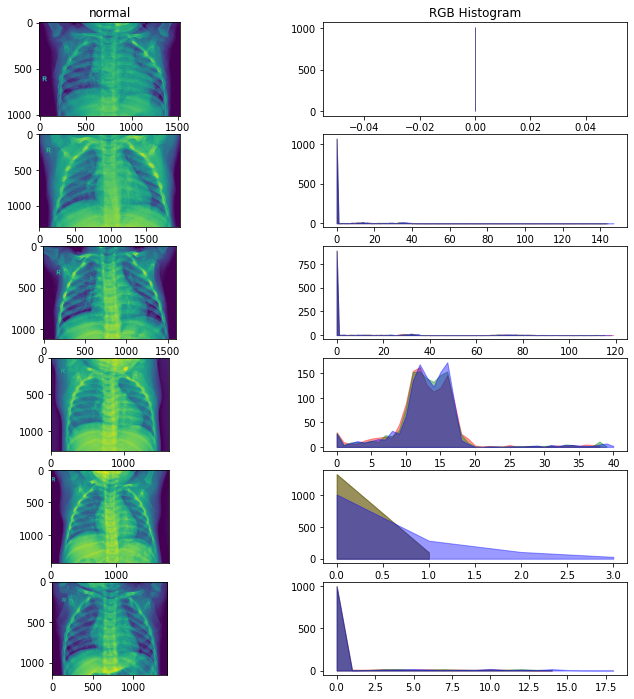

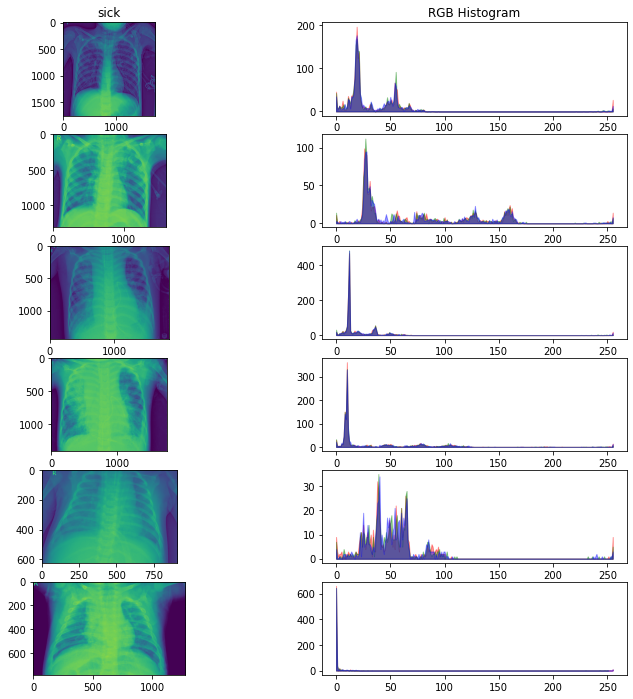

In [8]:
for paths, label in [(train_images_normal[:6],"normal"), (train_images_sick[:6], "sick")]:
    plot_graph_hist(paths, title_left = label, title_right = 'RGB Histogram', mode = 'RGB')

Things we can do after fixing the sizes of the image: generate average diagrams from sick and normal (should get better outcome)

In [9]:
from tensorflow.keras.preprocessing import image

# making n X m matrix
def img2np(list_of_filename, size = (500, 500)):
    # iterating through each file
    for i,fn in enumerate(list_of_filename):
        current_image = image.load_img(fn, target_size = size, color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
normal_images = img2np(train_images_normal[:50])
sick_images = img2np(train_images_sick[:50])

2023-05-21 18:55:30.155801: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 18:55:31.772681: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


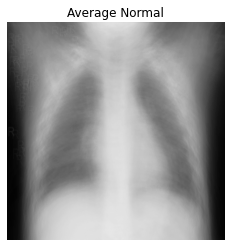

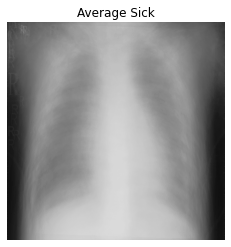

In [10]:
def find_mean_img(full_mat, title, size = (500, 500)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_images, 'Normal')
sick_mean = find_mean_img(sick_images, 'Sick')

In [11]:
from tensorflow.keras.preprocessing import image

# making n X m matrix
def img2np(list_of_filename, size = (500, 500)):
    # iterating through each file
    for i,fn in enumerate(list_of_filename):
        current_image = image.load_img(fn, target_size = size, color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
normal_images = img2np(train_images_normal[:50])
sick_images = img2np(train_images_sick[:50])

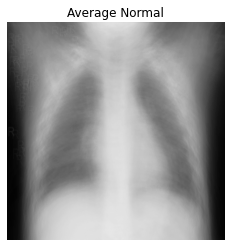

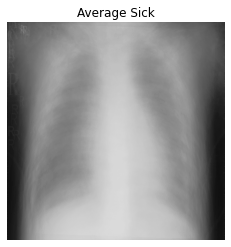

In [12]:
def find_mean_img(full_mat, title, size = (500, 500)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_images, 'Normal')
sick_mean = find_mean_img(sick_images, 'Sick')

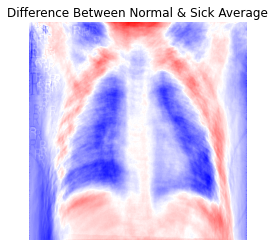

In [13]:
contrast_mean = norm_mean - sick_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Normal & Sick Average')
plt.axis('off')
plt.show()

### Image Deminsion Analysis

In [14]:
train_images = os.listdir(os.path.join(image_address, 'train'))
test_images = os.listdir(os.path.join(image_address, 'test'))
train_images_df = pd.DataFrame(train_images, columns=["filename"])
test_images_df = pd.DataFrame(test_images, columns=["filename"])

In [15]:
train_address = os.path.join(image_address, 'train')
test_address = os.path.join(image_address, 'test')

In [16]:
import cv2
# Add columns for image size, image aspect ratio, and image dimensions
train_images_df["image_size"] = train_images_df["filename"].apply(lambda x: os.path.getsize(os.path.join(train_address, x)))
train_images_df["image"] = train_images_df["filename"].apply(lambda x: cv2.imread(os.path.join(train_address, x), cv2.IMREAD_GRAYSCALE))
train_images_df["height"] = train_images_df["image"].apply(lambda x: x.shape[0])
train_images_df["width"] = train_images_df["image"].apply(lambda x: x.shape[1])
train_images_df["aspect_ratio"] = train_images_df["width"] / train_images_df["height"]


In [17]:
train_images_df.head()

,filename,image_size,image,height,width,aspect_ratio
0,person1651_bacteria_4381.jpeg,72968,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",816,1176,1.441176
1,person540_bacteria_2271.jpeg,73963,"[[21, 21, 21, 20, 20, 19, 19, 19, 18, 18, 17, ...",888,1136,1.279279
2,NORMAL2-IM-1008-0001.jpeg,518451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1329,1882,1.416102
3,person1463_virus_2516.jpeg,57096,"[[67, 66, 64, 63, 63, 64, 66, 67, 66, 65, 64, ...",744,1168,1.569892
4,NORMAL2-IM-1144-0001.jpeg,573511,"[[1, 38, 32, 30, 36, 40, 39, 46, 42, 45, 46, 4...",1241,1682,1.355359


In [18]:
# Display summary statistics for image size, aspect ratio, and dimensions
train_images_df.describe()

,image_size,height,width,aspect_ratio
count,5.309000e+03,5309.000000,5309.000000,5309.000000
mean,2.273710e+05,970.834432,1319.997551,1.435133
std,3.307003e+05,386.497723,368.514388,0.259149
min,5.441000e+03,127.000000,255.000000,0.835391
25%,5.639200e+04,688.000000,1056.000000,1.252768
50%,9.751400e+04,888.000000,1284.000000,1.407526
75%,3.011940e+05,1195.000000,1554.000000,1.580247
max,8.503175e+06,3480.000000,4248.000000,3.378788


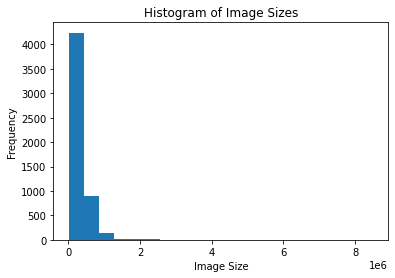

In [19]:
# Display a histogram of image sizes
plt.hist(train_images_df["image_size"], bins=20)
plt.title("Histogram of Image Sizes")
plt.xlabel("Image Size")
plt.ylabel("Frequency")
plt.show()

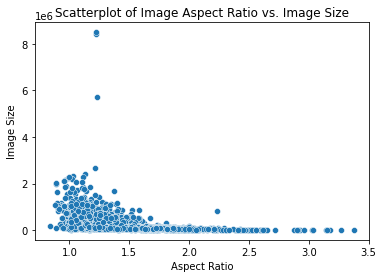

In [20]:
# Display a scatterplot of image aspect ratio vs. image size
sns.scatterplot(x=train_images_df["aspect_ratio"], y=train_images_df["image_size"])
plt.title("Scatterplot of Image Aspect Ratio vs. Image Size")
plt.xlabel("Aspect Ratio")
plt.ylabel("Image Size")
plt.show()

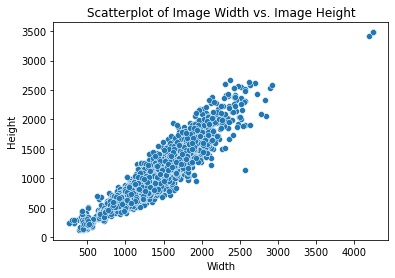

In [21]:
# Display a scatterplot of image height vs. image width
sns.scatterplot(x=train_images_df["width"], y=train_images_df["height"])
plt.title("Scatterplot of Image Width vs. Image Height")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()